# Zuber: Empresa de viajes compartidos en Chicago

# Descripción del Proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes

# Descripción de los datos

Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad
- name: nombre del barrio
- neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis
- cab_id: código del vehículo
- vehicle_id: ID técnico del vehículo
- company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes
- trip_id: código del viaje
- cab_id: código del vehículo que opera el viaje
- start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
- end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
- duration_seconds: duración del viaje en segundos
- distance_miles: distancia del viaje en millas
- pickup_location_id: código del barrio de recogida
- dropoff_location_id: código del barrio de finalización

tabla weather_records: datos sobre el clima
- record_id: código del registro meteorológico
- ts: fecha y hora del registro (tiempo redondeado a la hora)
- temperature: temperatura cuando se tomó el registro
- description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"


## Extracción de datos de página web

Se realizó y fue aprobado.

## Análisis exploratorio de datos (SQL)

Se realizó y fue aprobado.

## Prueba de hipótesis

Se realizó y fue aprobado.

## Análisis exploratorio de datos (Python) #

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

project_sql_result_04.csv. Contiene los siguientes datos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.


### Importar archivos de datos

In [1]:
# importamos las librerías a necesitar para completar el proyecto

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# importamos los archivos de datos

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

### Estudio de datos y validación de tipo de datos

In [3]:
# analizamos los datos del dataframe "df_companies"

print('Información General del dataframe:\n')
df_companies.info()
print()
print('Visualización de los 5 primeros registros:\n')
print(df_companies.head(5))
print()
print('Información estadística del dataframe:')
print(df_companies.describe())
print()
print('Número de duplicados: ', df_companies.duplicated().sum())

Información General del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Visualización de los 5 primeros registros:

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información estadística del dataframe:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Número de duplicados:  0


In [4]:
# analizamos los datos del dataframe "df_trips"

print('Información General del dataframe:\n')
df_trips.info()
print()
print('Visualización de los 5 primeros registros:\n')
df_trips.head(5)
print()
print('Número de duplicados: ', df_trips.duplicated().sum())

Información General del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Visualización de los 5 primeros registros:


Número de duplicados:  0


In [5]:
# analizamos los datos del dataframe "df_weather"

print('Información General del dataframe:\n')
print(df_weather.info())
print()
print('Visualización de los 5 primeros registros:\n')
print(df_weather.head(5))
print()
print('Número de duplicados: ', df_weather.duplicated().sum())

#eliminamos los valores duplicados del dataframe "df_weather"
df_weather.drop_duplicates(inplace = True, keep=False, ignore_index=True)
print()

#convertimos el tipo de dato del campo "start_ts" a datetime
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

#validamos los datos del dataframe luego de eliminar duplicados y corregir el tipo de datos del campo "start_ts"
print('Información General del dataframe posterior a la eliminación de duplicados:\n')
print(df_weather.info())
print()
print('Número de duplicados: ', df_weather.duplicated().sum())

Información General del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Visualización de los 5 primeros registros:

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Número de duplicados:  197

Información General del dataframe posterior a la eliminación de duplicados:

<class 'pandas.core.frame.DataFrame'>
RangeI

Se analizaron los datos de ambos dataframes, y se observo lo siguiente:
- La información del archivo csv a los dataframes se cargaron correctamente, número de filas del archivo csv es igual al número de registros de cada dataframe.
- Los nombres de las columnas estan claras por lo cual se mantuvieron.
- No hay datos nulos.
- El tipo de dato de cada campo es el adecuado para manipular los datos en los dataframes "df_trips" y "df_companies"; sin embargo, en el dataframe "df_weather" se convirtió el campo start_ts del tipo de dato object a datetime para una mejor manipulación de datos.
- No hay registros duplicados en los dataframe "df_trips" y "df_companies"; sin embargo, en el dataframe "df_weather" se encontaron 197 registros duplicados y se eliminaron al ser registros repetidos.

### Identificar los 10 principales barrios en términos de finalización

In [6]:
df_trips_top10 = df_trips.sort_values(by='average_trips', ascending = False).head(10)

df_trips_top10.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Gráficos

#### Empresas de taxis y número de viajes

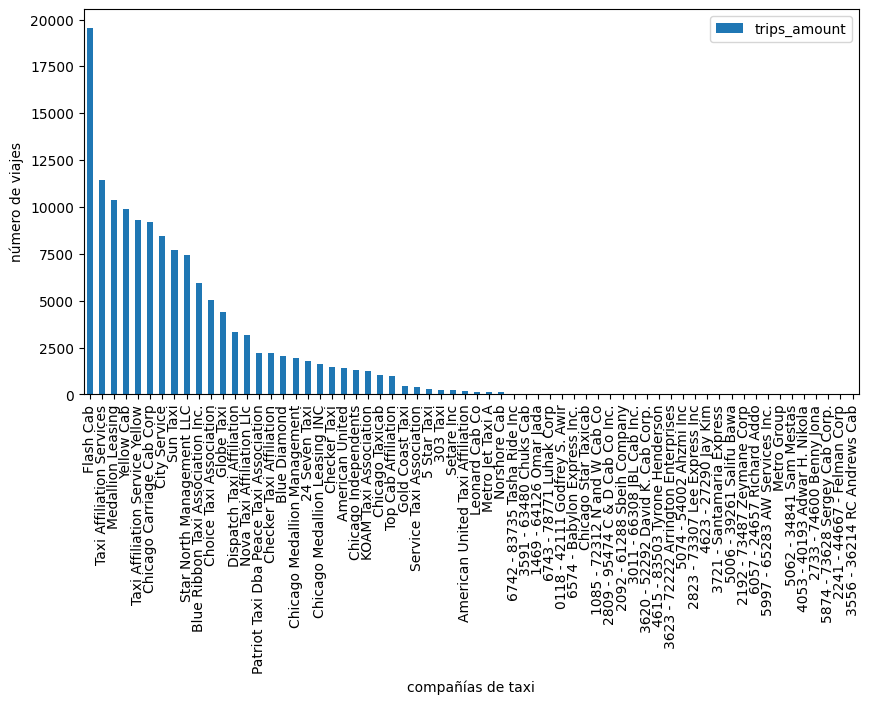

In [7]:
#Gráfica considerando todas las empresas de taxis
df_companies.plot(x='company_name', kind='bar', figsize = (10,5), ylabel = 'número de viajes', xlabel = 'compañías de taxi')
plt.show()

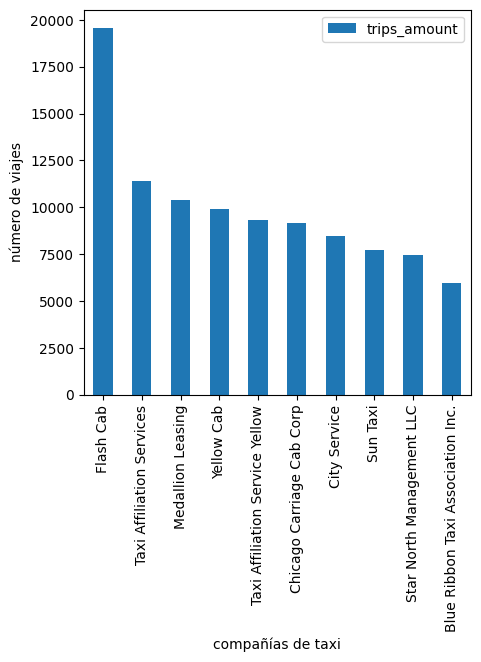

In [8]:
#Gráfica considerando solo el top 10 de empresas de taxi
df_companies.head(10).plot(x='company_name', kind='bar', figsize = (5,5), ylabel = 'número de viajes', xlabel = 'compañías de taxi')
plt.show()

Conclusiones, considerando que la información contiene viajes realizados entre el 15 y 16 de noviembre del 2017:
- La empresa que realizó más viajes fue "Flash Cab", representando el 14% del total de viajes.
- La empresa que menos viajes realizó fue Andrews Cab, con tan solo 2 viajes.
- Se observa que los taxis cuyos nombres empiezan con números tienen menos afluencia de pasajeros.

#### Los 10 barrios principales por número de finalizaciones

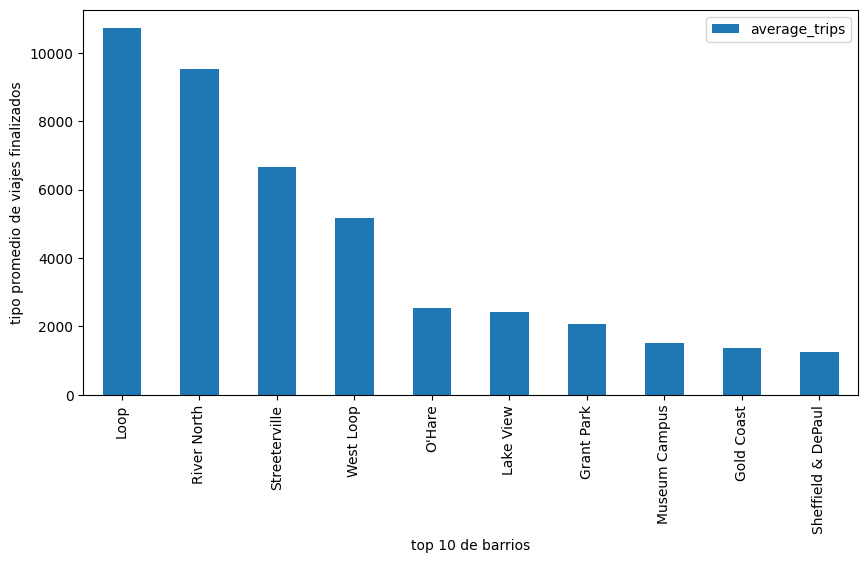

In [9]:
df_trips_top10.plot(x='dropoff_location_name', kind='bar', figsize = (10,5), ylabel = 'tipo promedio de viajes finalizados', xlabel = 'top 10 de barrios')
plt.show()

Conclusiones, considerando que la información recoge el promedio de viajes realizados en noviembre del 2017:
- El barrio más solicitado como destino final es "Loop" con un promedio de 10,727 viajes seguido de "River North" con un promedio 9,523 viajes. Considerando que son dos barrios muy solicitados porque ahí se encuentran: la zona financiera de Chicago, muchos restaurantes, clubes y atractivos turísticos, hace sentido que sean los barrios con el mayor número de viajes.
- Los barrios menos solicitados de un top 10 de barrios son: "Museum Campus", "Gold Coast" Y "Sheffield & DePaul" donde en promedio sus viajes tuvieron una duración 1,400 viajes.

## Prueba de Hipótesis (Python)


En base a los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Se solicita comprobar la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Considerar que los campos de la información contiene:
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

### Cómo planteaste las hipótesis nula y alternativa

Se asume como hipótesis nula la premisa que se busca comprobar si es cierto. Y como alternativa la premisa contraria, por ello, se define las hipótesis nula (Ho) y alternativa (H1) de la siguiente manera:
- Ho: "La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."
- H1: "La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos."

### Qué criterio usaste para probar las hipótesis y por qué


Para poder realizar la prueba de hipótesis, se debe realizar lo siguiente:

- Definir el valor del umbral alpha, para este ejercicio utilizaremos el valor en 0.05, valor que se suele usar por lo general, este número nos indica que la probabilidad de que rechacemos la hipótesis nula de manera errónea será el 5%.

- Validar si las varianzas son iguales o no.

In [10]:
#Creamos dos dataframe con la duracion de viajes en sabados con buen clima "df_good" y otro con mal clima "df_bad"
df_good = df_weather[df_weather['weather_conditions'] == 'Good']
df_bad = df_weather[df_weather['weather_conditions'] == 'Bad']

print(df_good.head())
print()
print(df_bad.head())


             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 04:00:00               Good            1320.0

              start_ts weather_conditions  duration_seconds
5  2017-11-04 16:00:00                Bad            2969.0
24 2017-11-18 12:00:00                Bad            1980.0
27 2017-11-04 17:00:00                Bad            2460.0
41 2017-11-18 12:00:00                Bad            2460.0
48 2017-11-04 18:00:00                Bad            2363.0


In [11]:
print('Varianza considerando sabados con días sin lluvia "Good" y con lluvia "Bad":')
print('- Good: ', np.var(df_good))
print('- Bad: ', np.var(df_bad))

Varianza considerando sabados con días sin lluvia "Good" y con lluvia "Bad":
- Good:  duration_seconds    604310.290612
dtype: float64
- Bad:  duration_seconds    599632.600466
dtype: float64


In [12]:
# Para saber si las varianzas son diferentes o no, usaremos la función de levene
st.levene(df_good['duration_seconds'], df_bad['duration_seconds'])

LeveneResult(statistic=0.2729310078444229, pvalue=0.6015258254547223)

La función de levene indica una significancia de 0.6015, el cual al ser mucho mayor que el umbral del alpha (0.05) nos indica que las varianzas son iguales.

In [13]:
#Realizamos la prueba de hipótesis

#umbral de alpha que definimos
alpha = 0.05

#usamos la función ttest_ind para probar la hipótesis
results = st.ttest_ind(df_good['duration_seconds'], df_bad['duration_seconds'], equal_var = True)

print()
print('valor p:', results.pvalue)
print()

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula.")


valor p: 8.891688328589038e-07

Rechazamos la hipótesis nula


Para esta evaluación el resultado indica que debemos rechazar la hipótesis nula; lo que significa que la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.